In [48]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

# Load and Prepare Data

Format of the data
- the column of the data frame must contain the label and it must also be called "label",label is the total consumption of the generator in KW
- there should be no missing values in the data frame

In [50]:
df = pd.read_csv("randomforest.csv")
df["label"] = df.quality
df = df.drop("quality", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

df.head(15)

,rowID,Date_&_Time,Usage_[kW],Generation,CT15_Amperage_[A],CT13_Amperage_[A],CT12_Amperage_[A],CT11_Amperage_[A],CT10_Amperage_[A],CT9_Amperage_[A],...,L1_Voltage_[V],CT5_Amperage_[A],CT4_Amperage_[A],CT14_Amperage_[A],P_123|_[kW],P_456|_[kW],P_global|_[kW],P_heat|_[kW],P_ground_floor|_[kW],label
0,1,2/10/2021 11:00,0,5.310,0.116,0.128,1.788,0.431,1.286,1.446,...,232.706011,0.939,0.433,0.125,1.021,0.087,3.015,0.001,1.215,5
1,2,2/10/2021 10:59,0,5.000,0.116,0.128,1.782,0.427,1.275,1.446,...,232.718011,0.887,0.430,0.125,1.021,0.087,2.976,0.001,1.143,5
2,3,2/10/2021 10:58,0,5.143,0.116,0.128,1.786,0.424,1.256,1.446,...,232.721011,0.834,0.428,0.125,1.014,0.087,2.947,0.001,1.093,5
3,4,2/10/2021 10:57,0,5.110,0.116,0.128,1.786,0.426,1.244,1.446,...,232.711011,0.781,0.426,0.126,1.004,0.087,2.932,0.001,1.084,5
4,5,2/10/2021 10:56,0,5.089,0.116,0.128,1.781,0.436,1.233,1.446,...,232.691011,0.728,0.425,0.126,0.996,0.084,2.931,0.001,1.076,5
5,6,2/10/2021 10:55,0,5.066,0.116,0.128,1.771,0.447,1.223,1.446,...,232.694011,0.675,0.424,0.126,0.989,0.083,2.923,0.001,1.068,5
6,7,2/10/2021 10:54,0,5.053,0.116,0.129,1.750,0.458,1.218,1.447,...,232.702011,0.624,0.425,0.126,0.984,0.083,2.921,0.001,1.062,5
7,8,2/10/2021 10:53,0,5.040,0.116,0.129,1.726,0.468,1.217,1.447,...,232.712011,0.580,0.426,0.126,0.976,0.083,2.919,0.001,1.060,5
8,9,2/10/2021 10:52,0,5.009,0.117,0.129,1.701,0.479,1.217,1.447,...,232.758011,0.531,0.426,0.127,0.961,0.082,2.908,0.001,1.055,5
9,10,2/10/2021 10:51,0,4.976,0.117,0.129,1.686,0.489,1.210,1.446,...,232.798011,0.484,0.426,0.127,0.948,0.081,2.895,0.001,1.050,4


In [51]:
# get some basic ideas about the data
def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')
    
summerize_data(df)

rowID
count    526996.000000
mean     263498.500000
std      152130.785568
min           1.000000
25%      131749.750000
50%      263498.500000
75%      395247.250000
max      526996.000000
Name: rowID, dtype: float64


Date_&_Time
10/25/2020 2:47    2
10/25/2020 2:23    2
10/25/2020 2:31    2
10/25/2020 2:52    2
10/25/2020 2:24    2
                  ..
9/16/2020 11:42    1
7/12/2020 1:08     1
9/4/2020 4:45      1
6/18/2020 6:51     1
6/27/2020 13:02    1
Name: Date_&_Time, Length: 526936, dtype: int64


Usage_[kW]
count    526996.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Usage_[kW], dtype: float64


Generation
count    526996.000000
mean          4.196415
std           2.224978
min           0.005000
25%           2.710000
50%           3.575000
75%           4.989000
max          25.166000
Name: Generation, dtype: float64


CT15_Amperage_[A]
count    526996.000000
mean          0.124958
std

<AxesSubplot:>

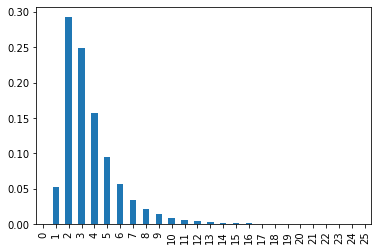

In [52]:
quality = df.label.value_counts(normalize=True)
quality = quality.sort_index()
quality.plot(kind="bar")

In [53]:
def transform_label(value):
    if value <= 4:
        return "Good"
    else:
        return "Bad"

df["label"] = df.label.apply(transform_label)

Good    0.751186
Bad     0.248814
Name: label, dtype: float64

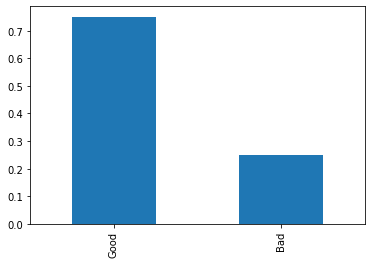

In [54]:
quality = df.label.value_counts(normalize=True)
quality[["Good", "Bad"]].plot(kind="bar")
quality

In [39]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

# Random Forest

In [40]:
#When training, each tree in a random forest learns from a random sample of the data points. 
#The samples are drawn with replacement, known as bootstrapping, which means that some samples will be used multiple times in a single tree.

def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [41]:
forest = random_forest_algorithm(train_df, n_trees=100, n_bootstrap=700, n_features=2, dt_max_depth=4)
predictions = random_forest_predictions(test_df, forest)
accuracy = calculate_accuracy(predictions, test_df.label)

print("Accuracy = {}".format(accuracy))

Accuracy = 0.943125
